<code>
from sklearn.module import Model
model = Model()
model.fit(X, y)
predictions = model.predict(X_new)
print(predictions)
  </code>  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection  import cross_val_score,KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [3]:
# fine tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


In [4]:
# preprocessing
from sklearn.impute import SimpleImputer

In [5]:
churn=pd.read_csv('G:\\datacamp\\21. Supervised\\telecom_churn_clean.csv')
churn.describe()

,Unnamed: 0,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
count,3333.00000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,1666.00000,101.064806,437.182418,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,962.29855,39.822106,42.371290,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,0.00000,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,833.00000,74.000000,408.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,1666.00000,101.000000,415.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,2499.00000,127.000000,510.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,3332.00000,243.000000,510.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [18]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              3333 non-null   int64  
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   international_plan      3333 non-null   int64  
 4   voice_mail_plan         3333 non-null   int64  
 5   number_vmail_messages   3333 non-null   int64  
 6   total_day_minutes       3333 non-null   float64
 7   total_day_calls         3333 non-null   int64  
 8   total_day_charge        3333 non-null   float64
 9   total_eve_minutes       3333 non-null   float64
 10  total_eve_calls         3333 non-null   int64  
 11  total_eve_charge        3333 non-null   float64
 12  total_night_minutes     3333 non-null   float64
 13  total_night_calls       3333 non-null   int64  
 14  total_night_charge      3333 non-null   

In [19]:
churn_df=churn

In [26]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the target variable
y = churn_df["churn"].values
X = churn_df[["account_length", "customer_service_calls"]].values

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

In [31]:
# Predict the labels for the X_new
y_pred = knn.predict(X)

# Print the predictions for X_new
print("Predictions: {}".format(y_pred)) 

Predictions: [0 0 0 ... 0 0 0]


## Measuring model performance
### Train/test split + computing accuracy
Now that you have learned about the importance of splitting your data into training and test sets, it's time to practice doing this on the churn_df dataset!

NumPy arrays have been created for you containing the features as X and the target variable as y. You will split them into training and test sets, fit a KNN classifier to the training data, and then compute its accuracy on the test data using the .score() method.

Instructions
100 XP
Import train_test_split from sklearn.model_selection.
Split X and y into training and test sets, setting test_size equal to 20%, random_state to 42, and ensuring the target label proportions reflect that of the original dataset.
Fit the knn model to the training data.
Compute and print the model's accuracy for the test data.

In [28]:
# Import the module
from sklearn.model_selection import train_test_split

X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.8545727136431784


In [29]:
### Overfitting and underfitting
Interpreting model complexity is a great way to evaluate performance when utilizing supervised learning. Your aim is to produce a model that can interpret the relationship between features and the target variable, as well as generalize well when exposed to new observations.

You will generate accuracy scores for the training and test sets using a KNN classifier with different n_neighbor values, which you will plot in the next exercise.

The training and test sets have been created from the churn_df dataset and preloaded as X_train, X_test, y_train, and y_test.

In addition, KNeighborsClassifier has been imported for you along with numpy as np.

Instructions
100 XP
Create neighbors as a numpy array of values from 1 up to and including 12.
Instantiate a KNN classifier, with the number of neighbors equal to the neighbor iterator.
Fit the model to the training data.
Calculate accuracy scores for the training set and test set separately using the .score() method, and assign the results to the index of the train_accuracies and test_accuracies dictionaries, respectively.


SyntaxError: invalid syntax (3709357467.py, line 2)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.8885971492873218, 3: 0.8994748687171793, 4: 0.8750937734433608, 5: 0.878469617404351, 6: 0.8660915228807202, 7: 0.8705926481620405, 8: 0.8615903975993998, 9: 0.86384096024006, 10: 0.858589647411853, 11: 0.8604651162790697, 12: 0.8574643660915229} 
 {1: 0.7856071964017991, 2: 0.8470764617691154, 3: 0.8320839580209896, 4: 0.856071964017991, 5: 0.8545727136431784, 6: 0.8590704647676162, 7: 0.8605697151424287, 8: 0.8620689655172413, 9: 0.863568215892054, 10: 0.8605697151424287, 11: 0.8605697151424287, 12: 0.8605697151424287}


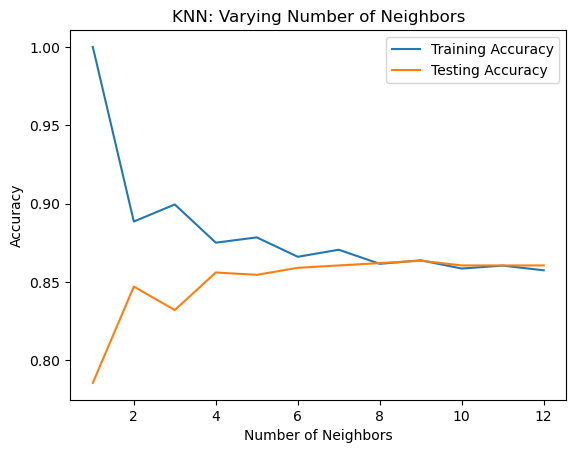

In [32]:
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
	# Set up a KNN Classifier
	knn = KNeighborsClassifier(n_neighbors=neighbor)
  
	# Fit the model
	knn.fit(X_train, y_train)
  
	# Compute accuracy
	train_accuracies[neighbor] = knn.score(X_train, y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

#Visualizing model complexity
# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

For the test set, accuracy peaks with 7 neighbors, suggesting it is the optimal value for our model. Now let's explore regression models!
# Regression
### Creating features
In this chapter, you will work with a dataset called sales_df, which contains information on advertising campaign expenditure across different media types, and the number of dollars generated in sales for the respective campaign. The dataset has been preloaded for you. Here are the first two rows:

     tv        radio      social_media    sales
1    13000.0   9237.76    2409.57         46677.90
2    41000.0   15886.45   2913.41         150177.83
You will use the advertising expenditure as features to predict sales values, initially working with the "radio" column. However, before you make any predictions you will need to create the feature and target arrays, reshaping them to the correct format for scikit-learn.

In [46]:
sales_df = pd.read_csv("G:\\datacamp\\21. Supervised\\advertising_and_sales_clean.csv")
print(sales_df.head())
# Create X from the radio column's values
X = sales_df["radio"].values

# Create y from the sales column's values
y = sales_df["sales"].values

# Reshape X
X = X.reshape(-1, 1)

# Check the shape of the features and targets
print(X.shape, y.shape)

        tv     radio  social_media influencer      sales
0  16000.0   6566.23       2907.98       Mega   54732.76
1  13000.0   9237.76       2409.57       Mega   46677.90
2  41000.0  15886.45       2913.41       Mega  150177.83
3  83000.0  30020.03       6922.30       Mega  298246.34
4  15000.0   8437.41       1406.00      Micro   56594.18
(4546, 1) (4546,)


### Building a linear regression model

In [47]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X,y)

# Make predictions
predictions = reg.predict(X)
print(X.shape,y.shape)
print(predictions[:5])

(4546, 1) (4546,)
[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


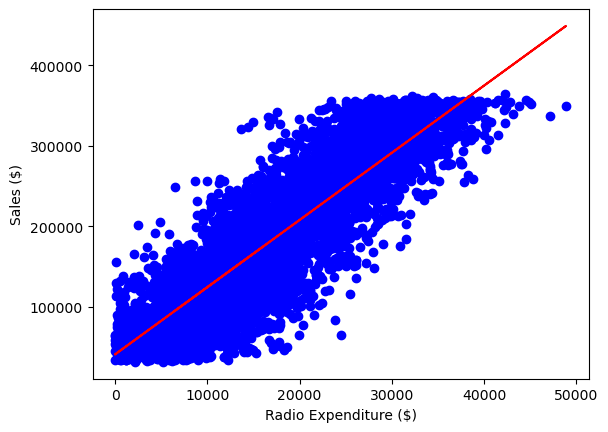

In [36]:
plt.scatter(X, y, color="blue")

# Create line plot
plt.plot(X, predictions, color="red")
plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")

# Display the plot
plt.show()

In [14]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4546 entries, 0 to 4545
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tv            4546 non-null   float64
 1   radio         4546 non-null   float64
 2   social_media  4546 non-null   float64
 3   influencer    4546 non-null   object 
 4   sales         4546 non-null   float64
dtypes: float64(4), object(1)
memory usage: 177.7+ KB


In [37]:
sales_df.influencer
sales_=sales_df.drop('influencer',axis=1)
sales_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4546 entries, 0 to 4545
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tv            4546 non-null   float64
 1   radio         4546 non-null   float64
 2   social_media  4546 non-null   float64
 3   sales         4546 non-null   float64
dtypes: float64(4)
memory usage: 142.2 KB


### Fit and predict for regression

Predictions: [ 53176.66154234  70996.19873235 267032.64132081 195731.02438566
 274005.60025851  38895.9585774  145781.46909434 224203.2024844
 217046.35135007 320357.41115011 103108.80467124  42456.18823357
 274196.57669472 227808.89866091 281179.95035559 220535.61197832
 270470.80480757 323931.66020023 284692.36946812 213530.15522098], Actual Values: [55261.28 67574.9 ]


<function matplotlib.pyplot.show(close=None, block=None)>

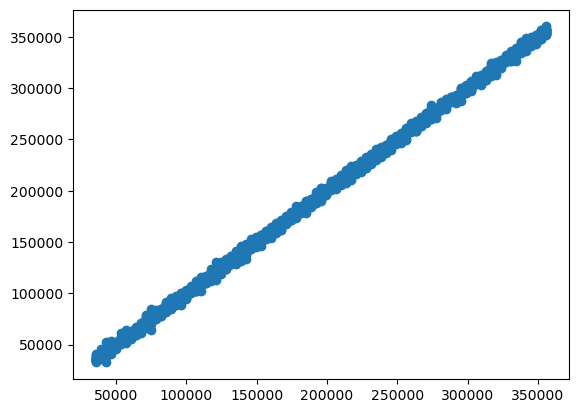

In [38]:
# Create X and y arrays
X = sales_.drop("sales", axis=1).values
y = sales_["sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:20], y_test[:2]))
plt.scatter(y_pred,y_test)
plt.show

In [48]:
from sklearn.metrics import mean_squared_error
# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

ValueError: X has 8 features, but LinearRegression is expecting 1 features as input.

In [49]:
#import sklearn.metrics
#help(sklearn.metrics.mean_squared_error)

### Cross-validation for R-squared
Cross-validation is a vital approach to evaluating a model. It maximizes the amount of data that is available to the model, as the model is not only trained but also tested on all of the available data.

In this exercise, you will build a linear regression model, then use 6-fold cross-validation to assess its accuracy for predicting sales using social media advertising expenditure. You will display the individual score for each of the six-folds.

In [50]:
# Import the necessary modules
from sklearn.model_selection  import cross_val_score,KFold
#from sklearn.model import KFold
# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(reg, X,y, cv=kf)

# Print scores
print(cv_scores)

[0.74470218 0.7724344  0.76841901 0.74186012 0.75174985 0.7444348 ]


In [51]:
# analyzing cross-validation

print(np.mean(cv_scores))
print(np.std(cv_scores))
# Print the 95% confidence interval
print(np.quantile(cv_scores, [.025, .975]))

0.7539333927705617
0.01209745544789685
[0.74218195 0.77193247]


Recall that fitting a linear regression model minimizes a loss function to choose a coefficient, a, for each feature, and the intercept, b. If we allow these coefficients to be very large, we can get overfitting. Therefore, it is common practice to alter the loss function so that it penalizes large coefficients. This is called regularization. Ridge regression-one type of reguliraztion
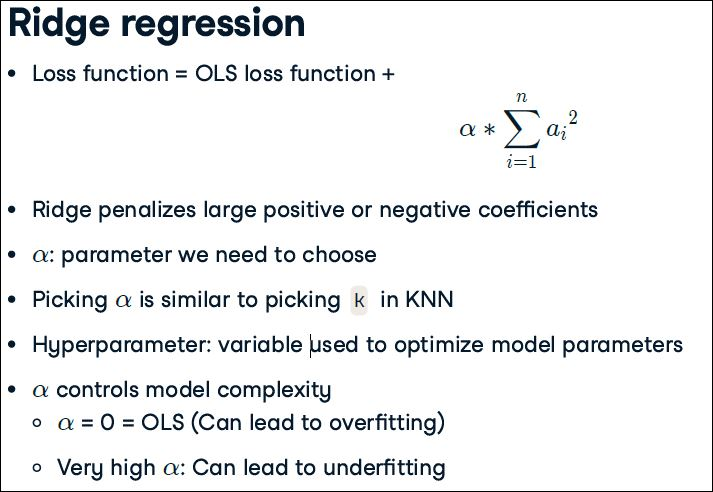
another one is <B> LASSO REGRESSION </B> where ai^2 is not used but |ai| is useed. Lasso regression can actually be used to assess feature importance. This is because it tends to shrink the coefficients of less important features to zero. The features whose coefficients are not shrunk to zero are selected by the lasso algorithm. Let's check this out in practice.

In [52]:
# Import Ridge
from sklearn.linear_model import Ridge
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:
  
  # Create a Ridge regression model
  ridge = Ridge(alpha=alpha)
  
  # Fit the data
  ridge.fit(X_train,y_train)
  
  # Obtain R-squared
  score = ridge.score(X_test,y_test)
  ridge_scores.append(score)
print(ridge_scores)

[0.22736859146807564, 0.22731051346647058, 0.22687119080632545, 0.22598778058861857, 0.22605704213705669, 0.211700928677113]


[8.36162768]


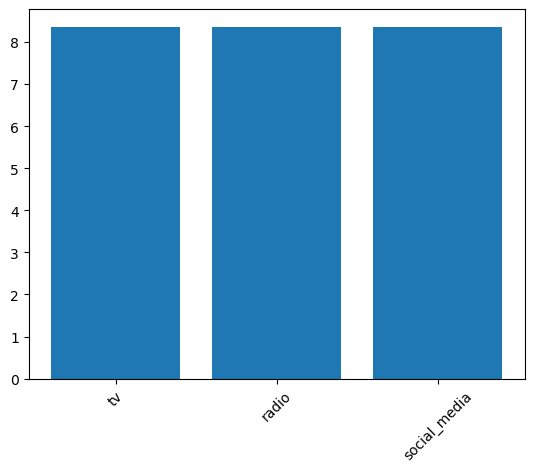

In [53]:
# Import Lasso
from sklearn.linear_model import Lasso
sales_columns = sales_.drop("sales", axis=1).columns
# Instantiate a lasso regression model
lasso = Lasso(alpha=.3)

# Fit the model to the data
lasso.fit(X,y)

# Compute and print the coefficients
lasso_coef = lasso.fit(X,y).coef_
print(lasso_coef)
plt.bar(sales_columns, lasso_coef)
plt.xticks(rotation=45)
plt.show()

# Fine tuning your model

### Assessing a diabetes prediction classifier
In this chapter you'll work with the diabetes_df dataset introduced previously.

The goal is to predict whether or not each individual is likely to have diabetes based on the features body mass index (BMI) and age (in years). Therefore, it is a binary classification problem. A target value of 0 indicates that the individual does not have diabetes, while a value of 1 indicates that the individual does have diabetes.

In [54]:
diabetes_df=pd.read_csv('G:\\datacamp\\21. Supervised\\diabetes_clean.csv')

In [55]:
diabetes_df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [56]:
X=diabetes_df.drop('diabetes',axis=1).values
y=diabetes_df['diabetes'].values
print(X.shape,y.shape)
print(diabetes_df.info())

(768, 8) (768,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [57]:
from sklearn.metrics import confusion_matrix,classification_report

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=.6,random_state=11)
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model to the training data
knn.fit(X_train,y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[261  43]
 [ 93  64]]
              precision    recall  f1-score   support

           0       0.74      0.86      0.79       304
           1       0.60      0.41      0.48       157

    accuracy                           0.70       461
   macro avg       0.67      0.63      0.64       461
weighted avg       0.69      0.70      0.69       461



### Building a logistic regression model
In this exercise, you will build a logistic regression model using all features in the diabetes_df dataset. The model will be used to predict the probability of individuals in the test set having a diabetes diagnosis.

In [58]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logreg = LogisticRegression()

# Fit the model
logreg.fit(X_train,y_train)

# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test)[:, 1]

print(y_pred_probs[:10])

[0.05546425 0.16847716 0.1126344  0.14954    0.030903   0.03921974
 0.03298873 0.14765752 0.30890651 0.52644459]


D:\anaconda\anaconda download\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### The ROC curve
Now you have built a logistic regression model for predicting diabetes status, you can plot the ROC curve to visualize how the true positive rate and false positive rate vary as the decision threshold changes.

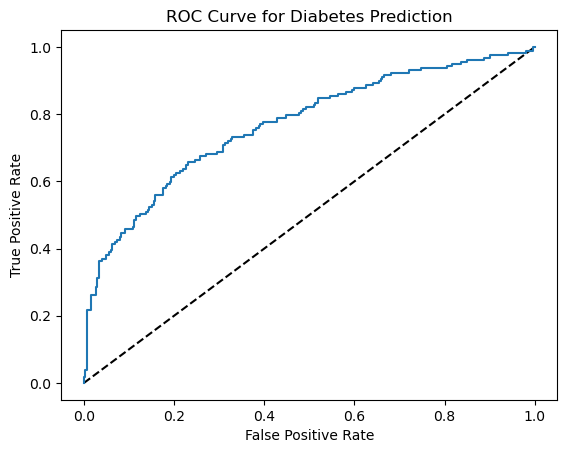

In [59]:
# Import roc_curve
from sklearn.metrics import roc_curve

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

Well done! The ROC curve is above the dotted line, so the model performs better than randomly guessing the class of each observation.

### ROC AUC
The ROC curve you plotted in the last exercise looked promising.

Now you will compute the area under the ROC curve, along with the other classification metrics you have used previously.



In [60]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Calculate roc_auc_score
print(roc_auc_score(y_test,y_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate the classification report
print(classification_report(y_test, y_pred))

0.7681025812939994
[[261  43]
 [ 93  64]]
              precision    recall  f1-score   support

           0       0.74      0.86      0.79       304
           1       0.60      0.41      0.48       157

    accuracy                           0.70       461
   macro avg       0.67      0.63      0.64       461
weighted avg       0.69      0.70      0.69       461



## Hyperparameter tuning
### Hyperparameter tuning with GridSearchCV
Now you have seen how to perform grid search hyperparameter tuning, you are going to build a lasso regression model with optimal hyperparameters to predict blood glucose levels using the features in the diabetes_df dataset.

In [61]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

kf=KFold(n_splits=5, random_state=42, shuffle=True)
# Set up the parameter grid
param_grid = {"alpha": np.linspace(.00001, 1, 20)}

lasso=Lasso()
# Instantiate lasso_cv
lasso_cv = GridSearchCV(lasso, param_grid, cv=kf)

# Fit to the training data
lasso_cv.fit(X_train,y_train)
print("Tuned lasso paramaters: {}".format(lasso_cv.best_params_))
print("Tuned lasso score: {}".format(lasso_cv.best_score_))

Tuned lasso paramaters: {'alpha': 0.05264105263157895}
Tuned lasso score: 0.2835863585775192


### Hyperparameter tuning with RandomizedSearchCV
As you saw, GridSearchCV can be computationally expensive, especially if you are searching over a large hyperparameter space. In this case, you can use RandomizedSearchCV, which tests a fixed number of hyperparameter settings from specified probability distributions.

In [26]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

# Create the parameter space
params = {"penalty": ["l1", "l2"],
         "tol": np.linspace(0.0001, 1.0, 50),
         "C": np.linspace(.1, 1, 50),
         "class_weight": ["balanced", {0:.8, 1:.2}]}
logreg=LogisticRegression(max_iter=1000)
# Instantiate the RandomizedSearchCV object
logreg_cv= RandomizedSearchCV(logreg, params, cv=kf)

# Fit the data to the model
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Best Accuracy Score: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'tol': 0.5306591836734694, 'penalty': 'l2', 'class_weight': {0: 0.8, 1: 0.2}, 'C': 0.6326530612244898}
Tuned Logistic Regression Best Accuracy Score: 0.6970914859862507


D:\anaconda\anaconda download\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "D:\anaconda\anaconda download\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda\anaconda download\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\anaconda\anaconda download\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    rai

In [29]:
X_train.shape,y_train.shape

((307, 8), (307,))

# 4.Preprocessing and Pipelines
### Creating dummy variables
Being able to include categorical features in the model building process can enhance performance as they may add information that contributes to prediction accuracy.

In [62]:
music=pd.read_csv('G:\\datacamp\\21. Supervised\\music_clean.csv')
music_df=music
display(music_df.head())
music_df.info()

,Unnamed: 0,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,36506,60.0,0.896000,0.726,214547.0,0.177,0.000002,0.1160,-14.824,0.0353,92.934,0.618,1
1,37591,63.0,0.003840,0.635,190448.0,0.908,0.083400,0.2390,-4.795,0.0563,110.012,0.637,1
2,37658,59.0,0.000075,0.352,456320.0,0.956,0.020300,0.1250,-3.634,0.1490,122.897,0.228,1
3,36060,54.0,0.945000,0.488,352280.0,0.326,0.015700,0.1190,-12.020,0.0328,106.063,0.323,1
4,35710,55.0,0.245000,0.667,273693.0,0.647,0.000297,0.0633,-7.787,0.0487,143.995,0.300,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1000 non-null   int64  
 1   popularity        1000 non-null   float64
 2   acousticness      1000 non-null   float64
 3   danceability      1000 non-null   float64
 4   duration_ms       1000 non-null   float64
 5   energy            1000 non-null   float64
 6   instrumentalness  1000 non-null   float64
 7   liveness          1000 non-null   float64
 8   loudness          1000 non-null   float64
 9   speechiness       1000 non-null   float64
 10  tempo             1000 non-null   float64
 11  valence           1000 non-null   float64
 12  genre             1000 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 101.7 KB


In [63]:
spotify=pd.read_csv('G:\\datacamp\\21. Supervised\\New folder\\archive\\dataset.csv')
spotify.info()
spotify.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [64]:
# Create music_dummies
music_dummies = pd.get_dummies(music_df,drop_first=True)

# Print the new DataFrame's shape
print("Shape of music_dummies: {}".format(music_dummies.shape))

Shape of music_dummies: (1000, 13)


### Regression with categorical features
Now you have created music_dummies, containing binary features for each song's genre, it's time to build a ridge regression model to predict song popularity.
The model will be evaluated by calculating the average RMSE, but first, you will need to convert the scores for each fold to positive values and take their square root. This metric shows the <br> average error of our model's predictions </br>, so it can be compared against the standard deviation of the target value—"popularity"

In [70]:
# Create X and y
X = music_dummies.drop('popularity',axis=1).values
y = music_dummies['popularity'].values
print(music_dummies)
# Instantiate a ridge model
ridge = Ridge(alpha=.2)

# Perform cross-validation
scores = cross_val_score(ridge, X,y, cv=kf, scoring="neg_mean_squared_error")

# Calculate RMSE
rmse = np.sqrt(-scores)
print("Average RMSE: {}".format(np.mean(rmse)))
print("Standard Deviation of the target array: {}".format(np.std(y)))

     Unnamed: 0  popularity  acousticness  danceability  duration_ms  energy  \
0         36506        60.0      0.896000         0.726     214547.0  0.1770   
1         37591        63.0      0.003840         0.635     190448.0  0.9080   
2         37658        59.0      0.000075         0.352     456320.0  0.9560   
3         36060        54.0      0.945000         0.488     352280.0  0.3260   
4         35710        55.0      0.245000         0.667     273693.0  0.6470   
..          ...         ...           ...           ...          ...     ...   
995       44501        57.0      0.972000         0.193     208040.0  0.0329   
996       25114        56.0      0.005790         0.939     144453.0  0.3730   
997       46896        54.0      0.016100         0.739     238339.0  0.5390   
998       45135        62.0      0.326000         0.515     286707.0  0.5050   
999       18960        42.0      0.029500         0.291     194679.0  0.5980   

     instrumentalness  liveness  loudne

## Handling missing data
Imputation - use subject-matter expertise to replace missing data with educated guesses<br>
Common to use the mean<br>
Can also use the median, or another value<br>
For categorical values, we typically use the most frequent value - the mode<br>
Must split our data ,rst, to avoid data leakage<br>

In [43]:
spotify.isna().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [65]:
spotify_df=spotify.dropna(subset=["track_genre", "popularity", "loudness", "liveness", "tempo"])
print(spotify_df.isna().sum().sort_values())

Unnamed: 0          0
tempo               0
valence             0
liveness            0
instrumentalness    0
acousticness        0
speechiness         0
mode                0
loudness            0
time_signature      0
key                 0
danceability        0
explicit            0
duration_ms         0
popularity          0
track_id            0
energy              0
track_genre         0
track_name          1
album_name          1
artists             1
dtype: int64


In [79]:
# Convert genre to a binary feature
spotify_df["genre"] = np.where(spotify_df["track_genre"] == "Rock",1,0)
#print(np.where(spotify_df["track_genre"] == "Rock",1,0))
print(spotify_df.isna().sum().sort_values())
print("Shape of the `spotify_df`: {}".format(spotify_df.shape))
spotify_df.head(7)

Unnamed: 0          0
time_signature      0
tempo               0
valence             0
liveness            0
instrumentalness    0
acousticness        0
speechiness         0
mode                0
loudness            0
key                 0
energy              0
danceability        0
explicit            0
duration_ms         0
popularity          0
track_id            0
track_genre         0
genre               0
track_name          1
album_name          1
artists             1
dtype: int64
Shape of the `spotify_df`: (114000, 22)


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,0
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,0
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,0
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,0
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,0
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,...,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic,0
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,...,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic,0


In [67]:
from sklearn.impute import SimpleImputer
help(SimpleImputer)

Help on class SimpleImputer in module sklearn.impute._base:

class SimpleImputer(_BaseImputer)
 |  SimpleImputer(*, missing_values=nan, strategy='mean', fill_value=None, verbose='deprecated', copy=True, add_indicator=False, keep_empty_features=False)
 |  
 |  Univariate imputer for completing missing values with simple strategies.
 |  
 |  Replace missing values using a descriptive statistic (e.g. mean, median, or
 |  most frequent) along each column, or using a constant value.
 |  
 |  Read more in the :ref:`User Guide <impute>`.
 |  
 |  .. versionadded:: 0.20
 |     `SimpleImputer` replaces the previous `sklearn.preprocessing.Imputer`
 |     estimator which is now removed.
 |  
 |  Parameters
 |  ----------
 |  missing_values : int, float, str, np.nan, None or pandas.NA, default=np.nan
 |      The placeholder for the missing values. All occurrences of
 |      `missing_values` will be imputed. For pandas' dataframes with
 |      nullable integer dtypes with missing values, `missing_v

#### Pipeline for song genre prediction: I
Now it's time to build a pipeline. It will contain steps to impute missing values using the mean for each feature and build a KNN model for the classification of song genre.

The modified music_df dataset that you created in the previous exercise has been preloaded for you, along with KNeighborsClassifier and train_test_split


In [84]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [91]:
spotify_df['track_genre']=spotify_df['track_genre'].astype('category')
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Unnamed: 0        114000 non-null  int64   
 1   track_id          114000 non-null  object  
 2   artists           113999 non-null  object  
 3   album_name        113999 non-null  object  
 4   track_name        113999 non-null  object  
 5   popularity        114000 non-null  int64   
 6   duration_ms       114000 non-null  int64   
 7   explicit          114000 non-null  bool    
 8   danceability      114000 non-null  float64 
 9   energy            114000 non-null  float64 
 10  key               114000 non-null  int64   
 11  loudness          114000 non-null  float64 
 12  mode              114000 non-null  int64   
 13  speechiness       114000 non-null  float64 
 14  acousticness      114000 non-null  float64 
 15  instrumentalness  114000 non-null  float64 
 16  li

In [90]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# Import modules
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Instantiate an imputer
imputer = SimpleImputer()

# Instantiate a knn model
knn = KNeighborsClassifier(n_neighbors=3)

# Build steps for the pipeline
steps = [("imputer", imputer), 
         ("knn", knn)]

# Create the pipeline
pipeline = Pipeline(steps)


# Identify numerical and categorical columns
numerical_features = ['popularity', 'duration_ms', 'danceability', 'energy', 'key',
                      'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
                      'liveness', 'valence', 'tempo', 'time_signature']

categorical_features = ['explicit', 'track_genre']  # Add other categorical columns if needed

# Split into training and test sets
X = spotify_df.drop("genre", axis=1)
y = spotify_df["genre"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

# Preprocess categorical columns using one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_features),
        ('cat', SimpleImputer(strategy='constant', fill_value='missing'), categorical_features)
    ], remainder='passthrough')  # Include the remaining columns as-is

# ...

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: '6kHzCalLooWnoQoLmfr1fl'


It appears that there's an issue with the 'track_genre' column in your dataset. we need to scale data before using pipeline
## 4.3//Centering and scaling

In [92]:
print(spotify_df[["duration_ms", "loudness", "speechiness"]].describe()) ## without sca;ing We see that the ranges vary widely: duration_ms ranges from zero to one-point-six-two million, speechiness contains only decimal places, and loudness only has negative values!

        duration_ms       loudness    speechiness
count  1.140000e+05  114000.000000  114000.000000
mean   2.280292e+05      -8.258960       0.084652
std    1.072977e+05       5.029337       0.105732
min    0.000000e+00     -49.531000       0.000000
25%    1.740660e+05     -10.013000       0.035900
50%    2.129060e+05      -7.004000       0.048900
75%    2.615060e+05      -5.003000       0.084500
max    5.237295e+06       4.532000       0.965000


In [95]:
#music_df["genre"] = np.where(spotify_df["track_genre"] == "Rock",1,0)
music_df=spotify_df[['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'genre']]
music_df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,73,0.0322,0.676,230666,0.4610,0.000001,0.3580,-6.746,0.1430,87.917,0.715,0
1,55,0.9240,0.420,149610,0.1660,0.000006,0.1010,-17.235,0.0763,77.489,0.267,0
2,57,0.2100,0.438,210826,0.3590,0.000000,0.1170,-9.734,0.0557,76.332,0.120,0
3,71,0.9050,0.266,201933,0.0596,0.000071,0.1320,-18.515,0.0363,181.740,0.143,0
4,82,0.4690,0.618,198853,0.4430,0.000000,0.0829,-9.681,0.0526,119.949,0.167,0


In [103]:
##will generate error

from sklearn.preprocessing import StandardScaler


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create pipeline steps
steps = [("scaler", StandardScaler()),
         ("lasso", Lasso(alpha=.5))]

# Instantiate the pipeline
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

# Calculate and print R-squared
print(pipeline.score(X_test, y_test))

1.0


D:\anaconda\anaconda download\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


## centering and scaling with pipeline cross validation

In [102]:
##will generate error

# Build the steps
steps = [("scaler", StandardScaler()),
         ("logreg", LogisticRegression())]
pipeline = Pipeline(steps)

# Create the parameter space
parameters = {"logreg__C": np.linspace(0.001, 1.0, 20)}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=21)

# Instantiate the grid search object
cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training data
cv.fit(X_train, y_train)
print(cv.best_score_, "\n", cv.best_params_)

1.0 
 {'knn__n_neighbors': 1}


https://campus.datacamp.com/courses/supervised-learning-with-scikit-learn/preprocessing-and-pipelines-4?ex=10

In [ ]:
models = {"Linear Regression": LinearRegression(), "Ridge": Ridge(alpha=0.1), "Lasso": Lasso(alpha=0.1)}
results = []

# Loop through the models' values
for model in models.values():
  kf = KFold(n_splits=6, random_state=42, shuffle=True)
  
  # Perform cross-validation
  cv_scores = cross_val_score(model, X_train,  y_train, cv=kf)
  
  # Append the results
  results.append(cv_scores)

# Create a box plot of the results
plt.boxplot(results, labels=models.keys())
plt.show()


In [104]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
X = music_df.drop("genre", axis=1).values
y = music_df["genre"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(),
"Decision Tree": DecisionTreeClassifier()}
results = []
for model in models.values():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
    results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()

ValueError: 
All the 6 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "D:\anaconda\anaconda download\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda\anaconda download\lib\site-packages\sklearn\linear_model\_logistic.py", line 1241, in fit
    raise ValueError(
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0


#### Visualizing regression model performance
Now you have seen how to evaluate multiple models out of the box, you will build three regression models to predict a song's "energy" levels.

The music_df dataset has had dummy variables for "genre" added. Also, feature and target arrays have been created, and these have been split into X_train, X_test, y_train, and y_test.

The following have been imported for you: LinearRegression, Ridge, Lasso, cross_val_score, and KFold.

In [ ]:
models = {"Linear Regression": LinearRegression(), "Ridge": Ridge(alpha=0.1), "Lasso": Lasso(alpha=0.1)}
results = []

# Loop through the models' values
for model in models.values():
  kf = KFold(n_splits=6, random_state=42, shuffle=True)
  
  # Perform cross-validation
  cv_scores = cross_val_score(model, X_train,  y_train, cv=kf)
  
  # Append the results
  results.append(cv_scores)

# Create a box plot of the results
plt.boxplot(results, labels=models.keys())
plt.show()

#### Predicting on the test set
In the last exercise, linear regression and ridge appeared to produce similar results. It would be appropriate to select either of those models; however, you can check predictive performance on the test set to see if either one can outperform the other.

You will use root mean squared error (RMSE) as the metric. The dictionary models, containing the names and instances of the two models, has been preloaded for you along with the training and target arrays X_train_scaled, X_test_scaled, y_train, and y_test.

In [ ]:

  # Import mean_squared_error
from sklearn.metrics import mean_squared_error

for name, model in models.items():
  
  # Fit the model to the training data
   model.fit(X_train_scaled, y_train)
  
  # Make predictions on the test set
   y_pred = model.predict(X_test_scaled)
  
  # Calculate the test_rmse
   test_rmse = mean_squared_error(y_test, y_pred, squared=False)
   print("{} Test Set RMSE: {}".format(name, test_rmse))

#### Visualizing classification model performance
In this exercise, you will be solving a classification problem where the "popularity" column in the music_df dataset has been converted to binary values, with 1 representing popularity more than or equal to the median for the "popularity" column, and 0 indicating popularity below the median.

Your task is to build and visualize the results of three different models to classify whether a song is popular or not.

The data has been split, scaled, and preloaded for you as X_train_scaled, X_test_scaled, y_train, and y_test. Additionally, KNeighborsClassifier, DecisionTreeClassifier, and LogisticRegression have been imported.

In [ ]:
# Create models dictionary
models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(), "Decision Tree Classifier": DecisionTreeClassifier()}
results = []

# Loop through the models' values
for model in models.values():
  
  # Instantiate a KFold object
  kf = KFold(n_splits=6, random_state=12, shuffle=True)
  
  # Perform cross-validation
  cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
  results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()